In [1]:
# Loading the Data and observing it 
import pandas as pd
import numpy as np
df=pd.read_csv('loan.csv', low_memory=False)
pd.set_option('display.max_columns', 120)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [2]:
df.shape

(39717, 111)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# checking Missing values in data
pd.set_option('display.max_rows', 120)
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
pd.set_option('display.max_rows', 120)
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [6]:
# right away dropping of columns which have more than 50% missing values
df=df.drop(['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75','mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d','mths_since_last_major_derog'
        ,'annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',                     
        'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',            
        'bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',          
        'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats',                       
        'num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0', 'num_sats',                          
        'num_tl_120dpd_2m','num_tl_30dpd'],axis=1)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# checking correlation between independent variables to find multicolinearity and hence remove such columns
# Some columns have a single value throughout (only 1 category ) , dropping such columns
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,0.020388,-0.019440,0.008763,0.042149,0.180619,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,0.017928,-0.018721,0.005113,0.044374,0.170743,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,0.317597,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,-0.052169,0.310392,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,-0.053214,0.290797,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,0.312679,0.230824,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,0.279961,0.235771,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,0.228743,0.229881,0.036095,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,-0.055125,0.067892,-0.003008,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.003375,NaN
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,0.024802,-0.022381,0.111499,-0.012106,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,NaN,NaN,NaN,NaN,NaN,0.016346,NaN


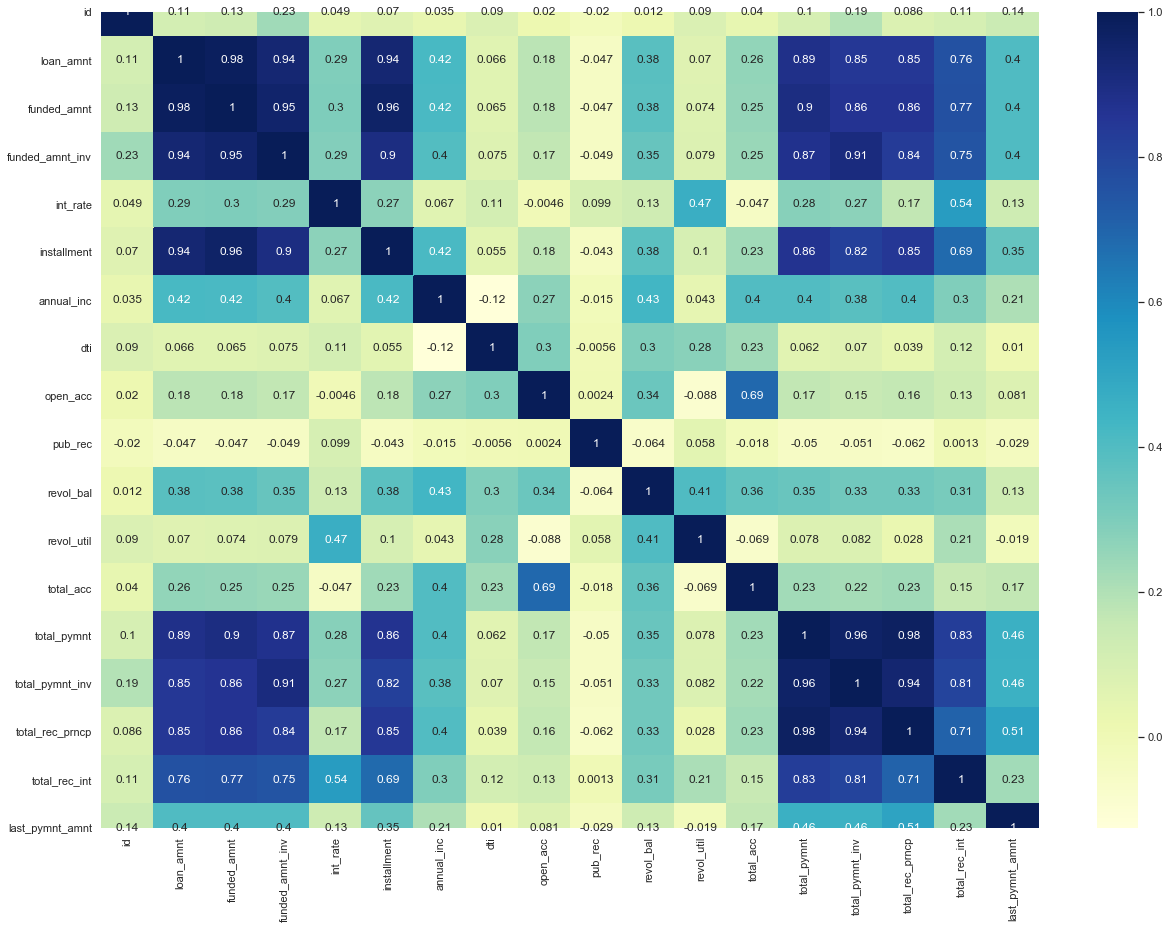

In [69]:
# plotting heat map for the same purpose
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(21,15)})
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [10]:
# dropping of multicolinear and single valued columns.
df=df.drop(['member_id','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med','desc','url','zip_code','pymnt_plan','initial_list_status','application_type'],axis=1)

In [11]:
# Summary statistic of data
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [12]:
df['last_pymnt_d'].value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-12     832
Jan-14     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Jun-15     220
Apr-16     220
Mar-16     216
Oct-10     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Sep-10     176
Dec-15     176
Feb-16    

In [13]:
# Row wise deletion/dropping  of columns which have less than 10 % missing values 
df_ms=df[df['title'].isnull()]
df=df.drop(df_ms.index)
df_ms=df[df['last_credit_pull_d'].isnull()]
df=df.drop(df_ms.index)
df_ms=df[df['revol_util'].isnull()]
df=df.drop(df_ms.index)
df_ms=df[df['emp_title'].isnull()]
df=df.drop(df_ms.index)
df_ms=df[df['emp_length'].isnull()]
df=df.drop(df_ms.index)

In [14]:
# imputing missing values in columns pub_rec_bankruptcies and last_pymnt_d with mode
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0])

In [15]:
df.shape

(37147, 41)

In [16]:
# all missing values are dealt with 
pd.set_option('display.max_rows', 120)
df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

In [17]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [18]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

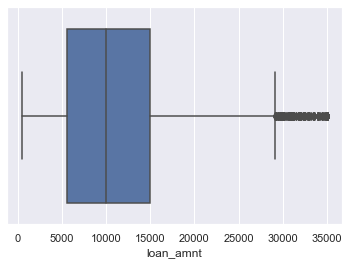

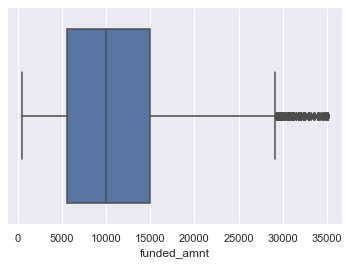

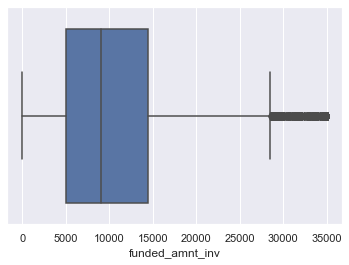

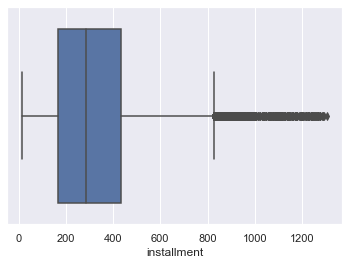

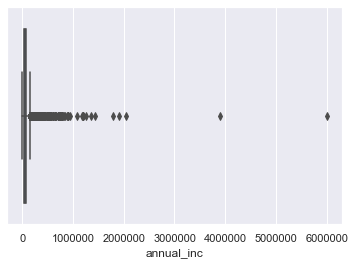

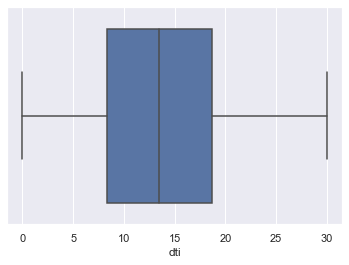

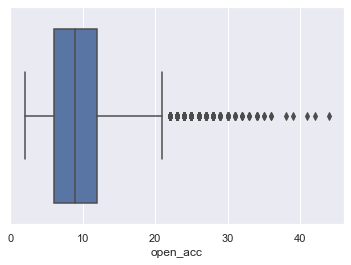

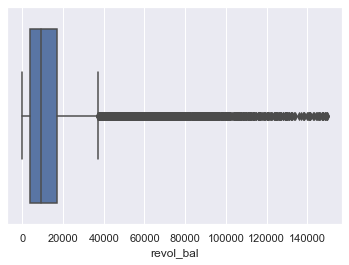

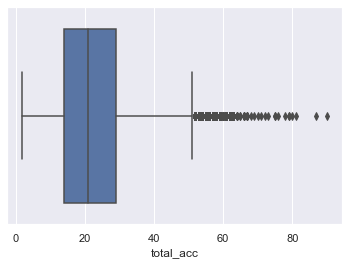

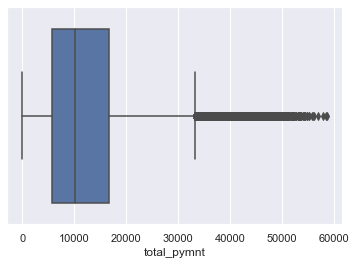

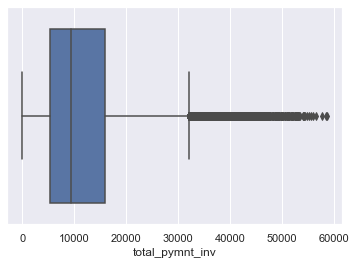

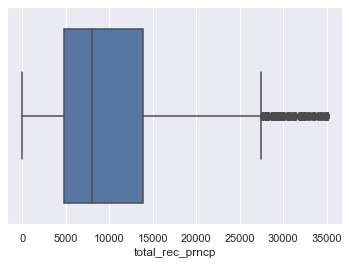

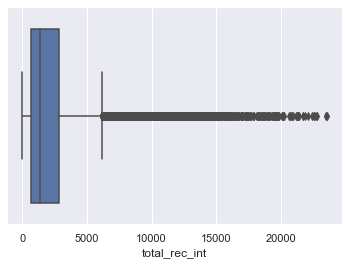

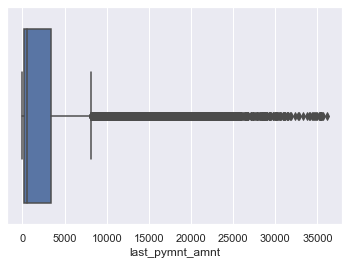

In [19]:
# Checking for outliers in the data ( in Numeric continous columns only ) using box plots
box_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment','annual_inc', 'dti', 'open_acc','revol_bal', 'total_acc','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']
for i in box_columns:
    sns.set(rc = {'figure.figsize':(6,4)})
    sns.boxplot(x=df[i])
    plt.show()

In [20]:
# Calculating the upper capping limit(UCL) for capping of outliers
for i in box_columns:
    Q1, Q3 = df[i].quantile([0.25,0.75])
    UCL = Q3 + 1.5 * (Q3 - Q1)
    print(i,"UCL = ", round(UCL))

loan_amnt UCL =  29100
funded_amnt UCL =  29250
funded_amnt_inv UCL =  28500
installment UCL =  828
annual_inc UCL =  145100
dti UCL =  34
open_acc UCL =  21
revol_bal UCL =  37324
total_acc UCL =  52
total_pymnt UCL =  33143
total_pymnt_inv UCL =  31965
total_rec_prncp UCL =  27492
total_rec_int UCL =  6149
last_pymnt_amnt UCL =  8180


In [21]:
# Capping all the outliers with the UCL value
df["loan_amnt"] = df["loan_amnt"].map(
    lambda x: 29100 if x > 29100 else x)
df["funded_amnt"] = df["funded_amnt"].map(
    lambda x: 29250 if x > 29250 else x)
df["funded_amnt_inv"] = df["funded_amnt_inv"].map(
    lambda x: 28500 if x > 28500 else x)
df["installment"] = df["installment"].map(
    lambda x: 828 if x > 828 else x)
df["annual_inc"] = df["annual_inc"].map(
    lambda x: 145100 if x > 145100 else x)
df["open_acc"] = df["open_acc"].map(
    lambda x: 21 if x > 21 else x)
df["revol_bal"] = df["revol_bal"].map(
    lambda x: 37324 if x > 37324 else x)
df["total_acc"] = df["total_acc"].map(
    lambda x: 52 if x > 52 else x)
df["total_pymnt"] = df["total_pymnt"].map(
    lambda x: 33143 if x > 33143 else x)
df["total_pymnt_inv"] = df["total_pymnt_inv"].map(
    lambda x: 31965 if x > 31965 else x)
df["total_rec_int"] = df["total_rec_int"].map(
    lambda x: 6149 if x > 6149 else x)
df["total_rec_prncp"] = df["total_rec_prncp"].map(
    lambda x: 27492 if x > 27492 else x)
df["last_pymnt_amnt"] = df["last_pymnt_amnt"].map(
    lambda x: 8180 if x > 8180 else x)

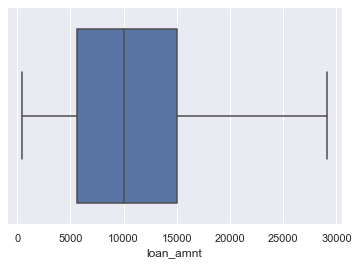

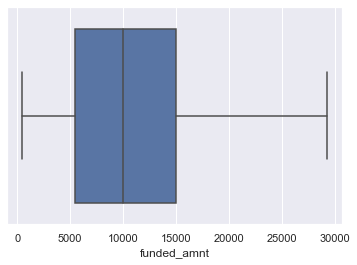

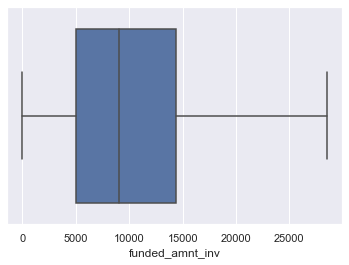

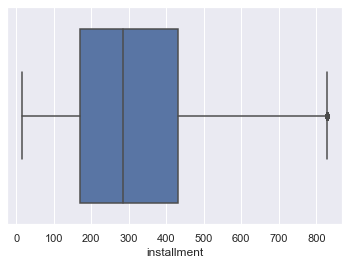

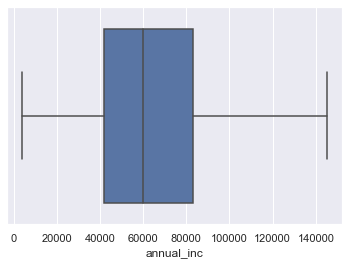

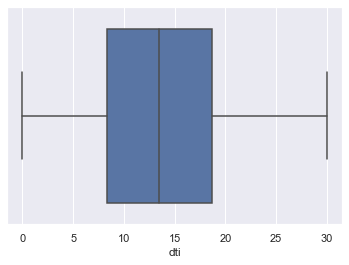

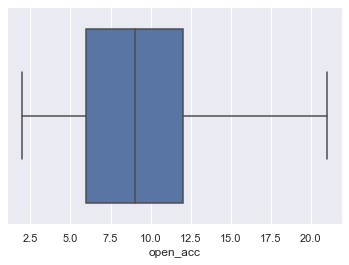

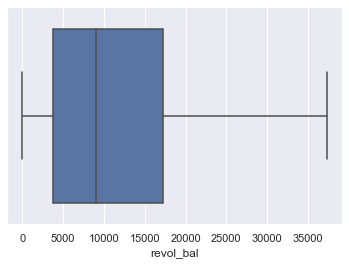

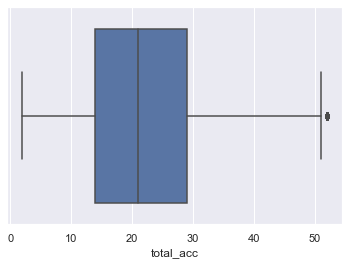

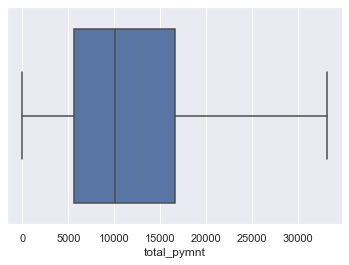

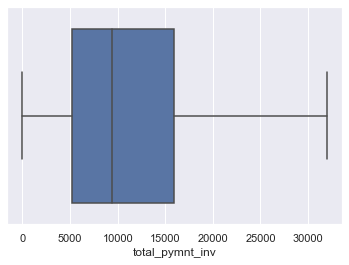

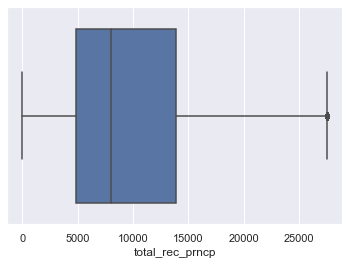

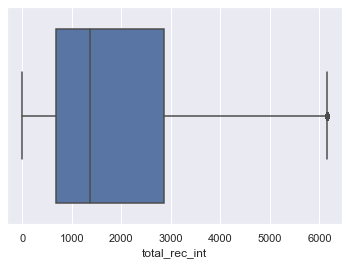

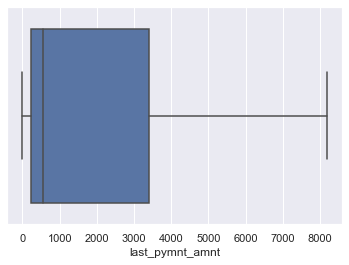

In [22]:
# How columns look after capping the outliers
for i in box_columns:
    sns.set(rc = {'figure.figsize':(6,4)})
    sns.boxplot(x=df[i])
    plt.show()

In [23]:
# Looking at the summary stats again here i observed that some of the columns needed to be binned
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.714700e+04,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000
mean,6.825040e+05,11163.529356,10915.966969,10350.086667,322.993673,65649.692003,13.399315,0.147280,0.868630,9.302097,0.053436,12038.750128,22.086494,51.457253,51.209725,12030.645387,11419.978789,9770.597992,2034.702081,1.338852,93.738088,11.880974,2156.557800,0.040784
std,2.107552e+05,7081.111102,6872.183745,6794.846250,198.019355,32300.026349,6.651724,0.494225,1.067411,4.225537,0.234400,10535.179630,11.076440,376.251455,374.857617,8328.123680,8200.375567,6724.767267,1802.317400,7.233724,684.584523,141.424342,2775.128162,0.198742
min,5.574200e+04,500.000000,500.000000,0.000000,16.080000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.161085e+05,5600.000000,5500.000000,5000.000000,168.670000,41600.000000,8.310000,0.000000,0.000000,6.000000,0.000000,3808.000000,14.000000,0.000000,0.000000,5648.978077,5220.175000,4800.000000,674.255000,0.000000,0.000000,0.000000,223.970000,0.000000
50%,6.645320e+05,10000.000000,10000.000000,9000.000000,283.280000,60000.000000,13.500000,0.000000,1.000000,9.000000,0.000000,9011.000000,21.000000,0.000000,0.000000,10068.883470,9419.380000,8000.000000,1374.130000,0.000000,0.000000,0.000000,562.650000,0.000000
75%,8.372640e+05,15000.000000,15000.000000,14400.000000,432.220000,83000.000000,18.650000,0.000000,1.000000,12.000000,0.000000,17214.500000,29.000000,0.000000,0.000000,16646.607930,15918.150000,13876.715000,2864.080000,0.000000,0.000000,0.000000,3406.480000,0.000000
max,1.077430e+06,29100.000000,29250.000000,28500.000000,828.000000,145100.000000,29.990000,11.000000,8.000000,21.000000,4.000000,37324.000000,52.000000,6311.470000,6307.370000,33143.000000,31965.000000,27492.000000,6149.000000,180.200000,29623.350000,7002.190000,8180.000000,2.000000


0     33099
1      3098
2       647
3       206
4        58
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64


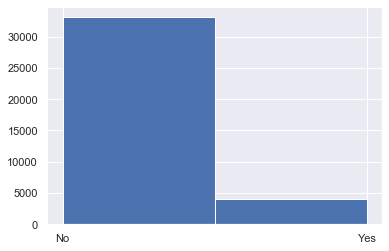

In [24]:
# Binning of Delinquency in 2 yrs column (Value counts before and after)binned to category no,yes
print(df['delinq_2yrs'].value_counts())
bins = [-1,0,12,]
df['delinquency'] = pd.cut(df['delinq_2yrs'] , bins=bins, labels=['No','Yes'], include_lowest=True)
plt.hist(df['delinquency'], bins=2)
plt.show()

0    18038
1    10264
2     5466
3     2844
4      300
5      131
6       58
7       32
8       14
Name: inq_last_6mths, dtype: int64


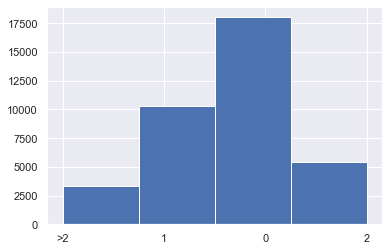

In [25]:
# Binning of inq_last_6mths column (Value counts before and after) binned to category 0,1,2,>2
print(df['inq_last_6mths'].value_counts())
bins = [-1,0,1,2,9]
df['no.of_inquiries_6mths'] = pd.cut(df['inq_last_6mths'] , bins=bins, labels=['0','1','2','>2'], include_lowest=True)
plt.hist(df['no.of_inquiries_6mths'], bins=4)
plt.show()

0.00        36081
3945.20         2
1717.38         1
2146.76         1
10644.16        1
            ...  
549.44          1
3211.96         1
2144.81         1
2050.34         1
1844.74         1
Name: total_out_principal, Length: 1066, dtype: int64


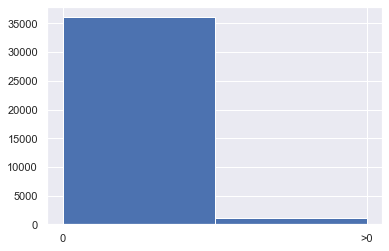

In [26]:
# As outstanding pr and outstanding pr inv are highly +vely correlated we form a column which is addition of both total_out_principal
# Binning of total_out_principal column (Value counts before and after) binned to category 0,>0
df['total_out_principal']=df['out_prncp']+df['out_prncp_inv']
print(df['total_out_principal'].value_counts())
bins = [-1,0,15000]
df['total_outstanding_principal'] = pd.cut(df['total_out_principal'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['total_outstanding_principal'], bins=2)
plt.show()

0.000000     35265
15.000000      231
30.000000       52
15.000000       50
15.000000       42
             ...  
44.840000        1
16.010000        1
29.914662        1
23.820000        1
29.750930        1
Name: total_rec_late_fee, Length: 1246, dtype: int64


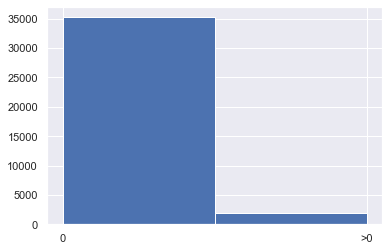

In [27]:
# Binning of total_rec_late_fee column (Value counts before and after) binned to category 0,>0
print(df['total_rec_late_fee'].value_counts())
bins = [-1,0,200]
df['total_recovery_late_fee'] = pd.cut(df['total_rec_late_fee'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['total_recovery_late_fee'], bins=2)
plt.show()

0.00       33304
19.20          3
13.93          3
10.40          3
14.61          3
           ...  
71.41          1
321.76         1
2563.40        1
1573.14        1
1842.51        1
Name: recoveries, Length: 3696, dtype: int64


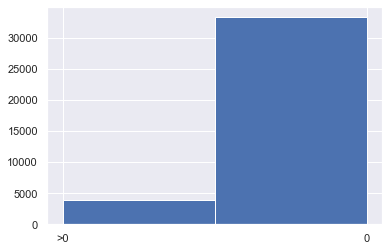

In [28]:
# Binning of recoveries column (Value counts before and after) binned to category 0,>0
print(df['recoveries'].value_counts())
bins = [-1,0,30000]
df['post_chg_recoveries'] = pd.cut(df['recoveries'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['post_chg_recoveries'], bins=2)
plt.show()

0.0000      33702
2.0000         10
1.2000         10
2.0200          8
1.6900          8
            ...  
33.2896         1
6.9239          1
340.0000        1
3.2500          1
268.0326        1
Name: collection_recovery_fee, Length: 2431, dtype: int64


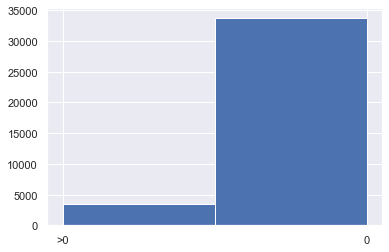

In [29]:
# Binning of collection_recovery_fee column (Value counts before and after) binned to category 0,>0
print(df['collection_recovery_fee'].value_counts())
bins = [-1,0,8000]
df['collection_recovery_fee'] = pd.cut(df['collection_recovery_fee'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['collection_recovery_fee'], bins=2)
plt.show()

0.0    35639
1.0     1501
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


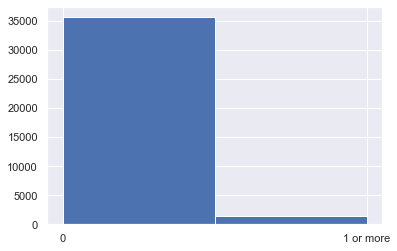

In [30]:
# Binning of pub_rec_bankruptcies column (Value counts before and after) binned to category 0,>0
print(df['pub_rec_bankruptcies'].value_counts())
bins = [-1,0,3]
df['pub_rec_bankruptcies'] = pd.cut(df['pub_rec_bankruptcies'] , bins=bins, labels=['0','1 or more'], include_lowest=True)
plt.hist(df['pub_rec_bankruptcies'], bins=2)
plt.show()

In [31]:
# Dropping of the earlier columns before the binning process which are now binned.
df=df.drop(['delinq_2yrs','inq_last_6mths','out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','total_out_principal'],axis=1)

In [32]:
df.head(100)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,delinquency,no.of_inquiries_6mths,total_outstanding_principal,total_recovery_late_fee,post_chg_recoveries
1,1077430,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,>0,Apr-13,119.66,Sep-13,0,No,>2,0,0,>0
3,1076863,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,Feb-96,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,0,Jan-15,357.48,Apr-16,0,No,1,0,>0,0
4,1075358,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,Jan-96,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0,May-16,67.79,May-16,0,No,0,>0,0,0
5,1075269,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,Nov-04,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0,Jan-15,161.03,Jan-16,0,No,>2,0,0,0
6,1069639,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,Jul-05,7,0,17726,85.60%,11,10110.840000,10110.84,6985.61,3125.23,0,May-16,1313.76,May-16,0,No,1,0,0,0
7,1072053,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,Jan-07,4,0,8221,87.50%,4,3939.135294,3939.14,3000.00,939.14,0,Jan-15,111.34,Dec-14,0,No,2,0,0,0
9,1071570,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,Sep-04,2,0,9279,36.50%,3,1476.190000,1469.34,673.48,533.42,>0,Nov-12,121.45,Mar-13,0,No,0,0,0,>0
10,1070078,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,High intrest Consolidation,AZ,16.12,Jan-98,14,0,4032,20.60%,23,7678.017673,7678.02,6500.00,1178.02,0,Jun-13,1655.54,Dec-15,0,No,2,0,0,0
11,1069908,12000,12000,12000.00000,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.00,Source Verified,Dec-11,Fully Paid,debt_consolidation,Consolidation,CA,10.78,Oct-89,12,0,23336,67.10%,34,13947.989160,13947.99,12000.00,1947.99,0,Sep-13,6315.30,Aug-13,0,No,0,0,0,0
12,1064687,9000,9000,9000.00000,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,debt_consolidation,freedom,VA,10.08,Apr-04,4,0,10452,91.70%,9,2270.700000,2270.70,1256.14,570.26,>0,Jul-12,305.38,Nov-12,0,No,1,0,0,>0


In [33]:
# Extracting only the year from columns issue_d, last_credit_pull_d and last_pymnt_d and categorising these columns on year.
a=[]
for i in df['issue_d']:
    i=i[4:]
    a.append(i)
df.insert(len(df.columns),"loan_issued_year",a,False)
df=df.drop(['issue_d'],axis=1)
df['loan_issued_year'].value_counts()

11    20191
10    10810
09     4434
08     1485
07      227
Name: loan_issued_year, dtype: int64

In [34]:
b=[]
for i in df['last_credit_pull_d']:
    i=i[4:]
    b.append(i)
df.insert(len(df.columns),"last_credit_pull_year",b,False)
df=df.drop(['last_credit_pull_d','earliest_cr_line'],axis=1)
df['last_credit_pull_year'].value_counts()

16    14525
14     5753
15     5189
13     4796
12     3770
11     2048
10      791
09      213
08       41
07       21
Name: last_credit_pull_year, dtype: int64

In [35]:
c=[]
for i in df['last_pymnt_d']:
    i=i[4:]
    c.append(i)
df.insert(len(df.columns),"last_pymnt_year",c,False)
df=df.drop(['last_pymnt_d'],axis=1)
df['last_pymnt_year'].value_counts()

13    8855
14    8577
12    8378
11    4695
15    2316
16    1974
10    1700
09     524
08     128
Name: last_pymnt_year, dtype: int64

In [36]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,delinquency,no.of_inquiries_6mths,total_outstanding_principal,total_recovery_late_fee,post_chg_recoveries,loan_issued_year,last_credit_pull_year,last_pymnt_year
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,3,0,1687,9.40%,4,1008.71,1008.71,456.46,435.17,>0,119.66,0,No,>2,0,0,>0,11,13,13
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,10,0,5598,21%,37,12231.89,12231.89,10000.00,2214.92,0,357.48,0,No,1,0,>0,0,11,16,15
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Current,other,Personal,OR,17.94,15,0,27783,53.90%,38,3513.33,3513.33,2475.94,1037.39,0,67.79,0,No,0,>0,0,0,11,16,16
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,9,0,7963,28.30%,12,5632.21,5632.21,5000.00,632.21,0,161.03,0,No,>2,0,0,0,11,16,15
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Loan,NC,23.51,7,0,17726,85.60%,11,10110.84,10110.84,6985.61,3125.23,0,1313.76,0,No,1,0,0,0,11,16,16


In [37]:
# Code to get number of categories in categorical columns
print("Number of Categories in: ")
for ColName in df[['emp_title','emp_length','title','term','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','pub_rec','pub_rec_bankruptcies',
       'delinquency', 'no.of_inquiries_6mths',
       'total_outstanding_principal', 'total_recovery_late_fee',
       'post_chg_recoveries', 'loan_issued_year', 'last_credit_pull_year',
       'last_pymnt_year']]:
    print("{} = {}".format(ColName,       len(df[ColName].unique())))

Number of Categories in: 
emp_title = 28730
emp_length = 11
title = 18362
term = 2
grade = 7
sub_grade = 35
home_ownership = 5
verification_status = 3
loan_status = 3
purpose = 14
addr_state = 50
pub_rec = 5
pub_rec_bankruptcies = 2
delinquency = 2
no.of_inquiries_6mths = 4
total_outstanding_principal = 2
total_recovery_late_fee = 2
post_chg_recoveries = 2
loan_issued_year = 5
last_credit_pull_year = 10
last_pymnt_year = 9


In [38]:
# Dropping of Variables/columns which have large no.of categories as they are not required emp_title can be depicted with annual income
# and sub_grade isnt required as we already have grade category same way title is not required because we have purpose column
df=df.drop(['emp_title','title','sub_grade'],axis=1)

In [39]:
df['loan_status'].value_counts()

Fully Paid     30966
Charged Off     5115
Current         1066
Name: loan_status, dtype: int64

In [40]:
# dropping all rows which have loan status category as 'Current'
df_ls=df[df['loan_status']=='Current']
df=df.drop(df_ls.index)
df['loan_status'].value_counts()

Fully Paid     30966
Charged Off     5115
Name: loan_status, dtype: int64

In [41]:
# Changing category of loan status such that Fully Paid = Non Defaulter and Charged Off = Defaulter
df['loan_status']=df['loan_status'].replace('Fully Paid','Non Defaulter')
df['loan_status']=df['loan_status'].replace('Charged Off','Defaulter')

In [42]:
df.shape

(36081, 36)

In [43]:
# Dropping total_outstanding_principal outstanding column as it has a single category.
print(df['total_outstanding_principal'].value_counts())
df=df.drop(['total_outstanding_principal'],axis=1)

0     36081
>0        0
Name: total_outstanding_principal, dtype: int64


Text(0, 0.5, 'Loan Application Count')

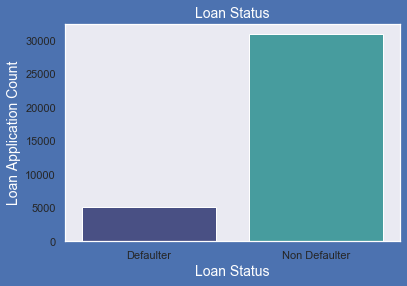

In [44]:
# Beginning with our Univariate analysis
plt.figure(figsize=(6,4),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=df,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            

# Observations :
# Below plot shows that close to 14% loans were Defaulters out of total loan issued.

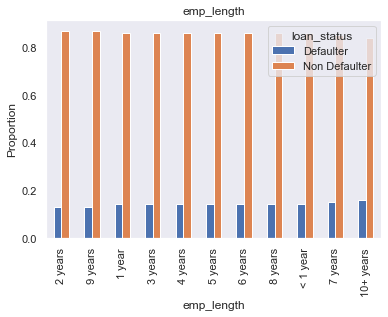

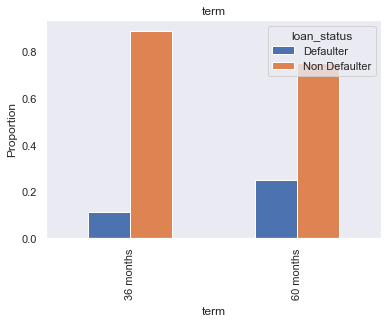

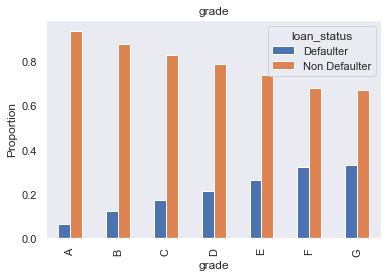

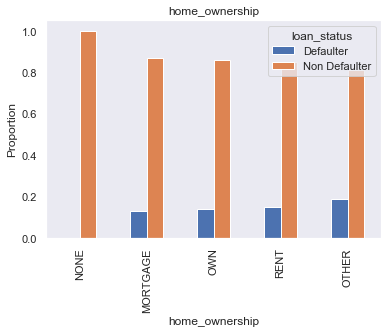

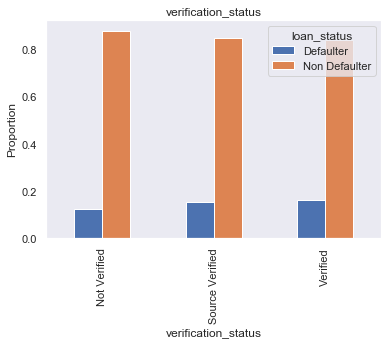

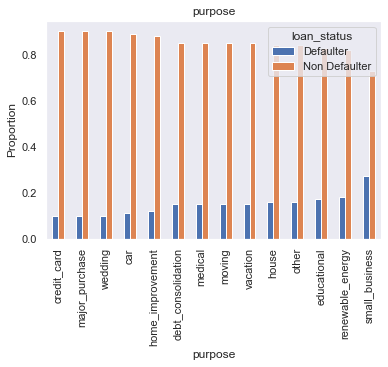

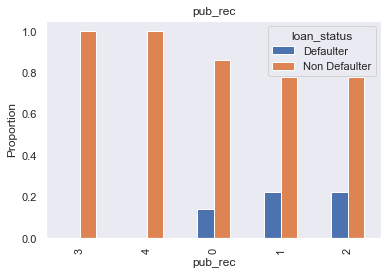

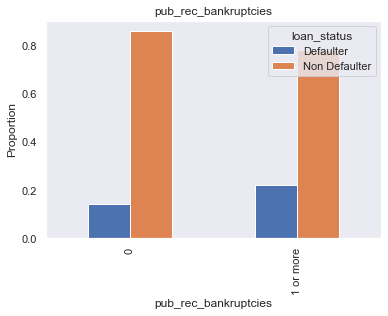

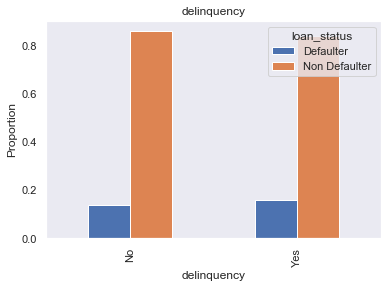

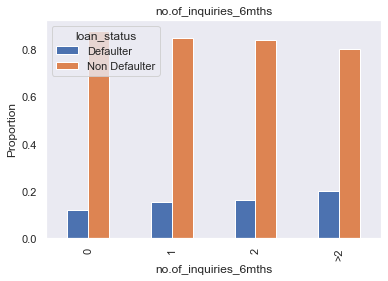

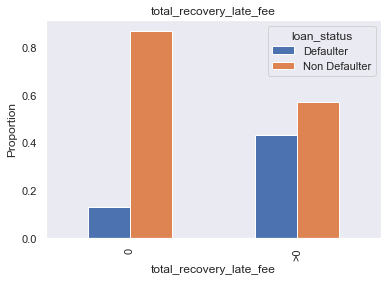

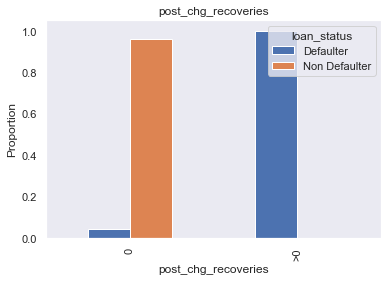

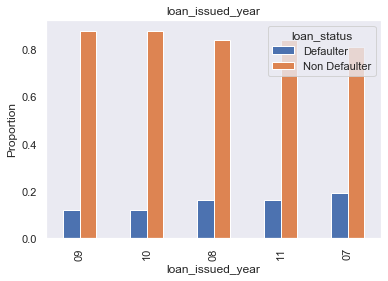

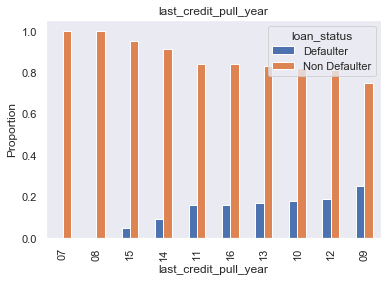

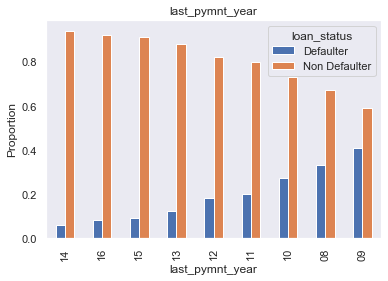

In [45]:
#plotting crosstabs to analyze dependence or association of independent categorical columns with loan status column
k=['emp_length','term','grade','home_ownership','verification_status','purpose',
       'pub_rec','pub_rec_bankruptcies',
       'delinquency', 'no.of_inquiries_6mths',
       'total_recovery_late_fee',
       'post_chg_recoveries', 'loan_issued_year', 'last_credit_pull_year',
       'last_pymnt_year']
for i in k:
    other= round(pd.crosstab(df[i], df['loan_status']).div(pd.crosstab(df[i],df['loan_status']).apply(sum,1),0),2)
    other.sort_values(by = 'Defaulter', inplace = True)
    ax = other.plot(kind ='bar', title = i, figsize = (6,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.show()

In [46]:
# Converting string to float
df.revol_util = df.revol_util.apply(lambda x:x[:-1])
df.revol_util = df.revol_util.astype('float')
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')

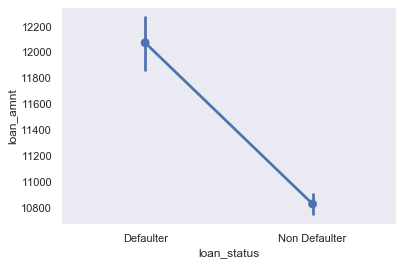

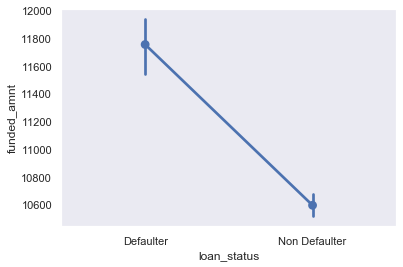

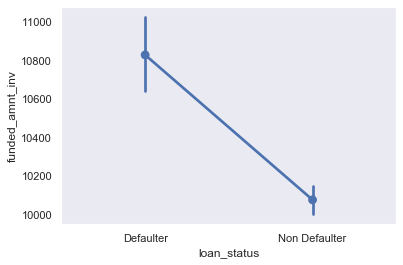

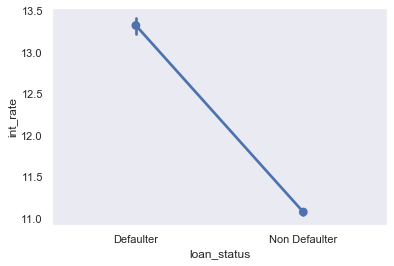

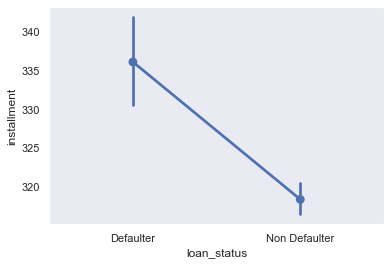

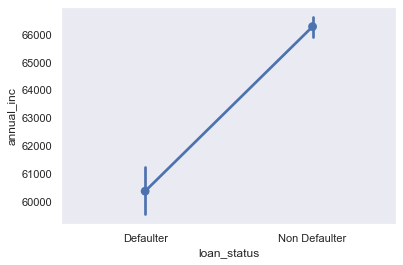

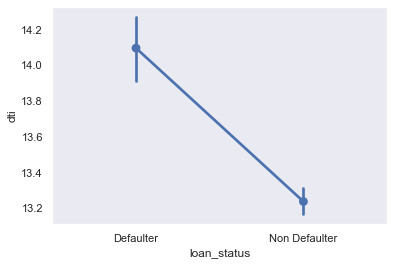

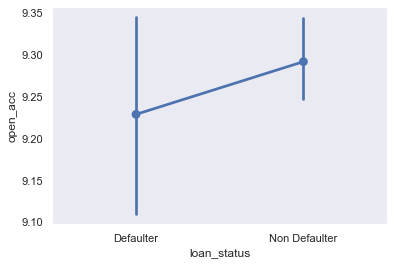

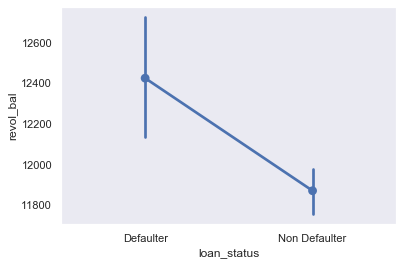

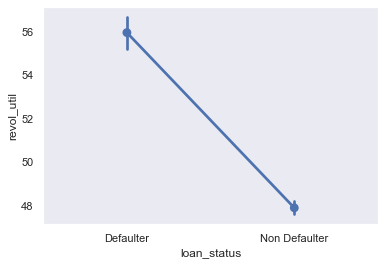

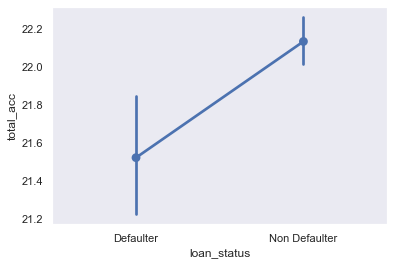

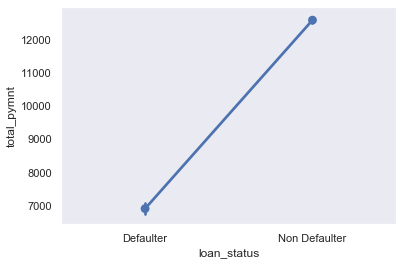

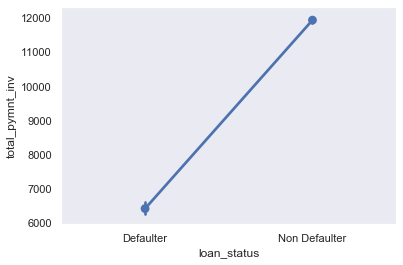

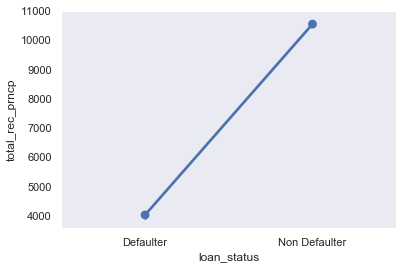

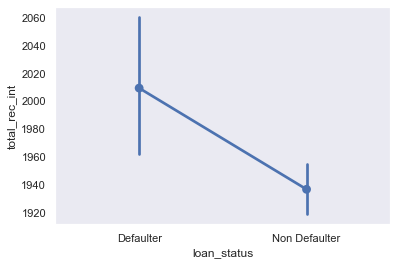

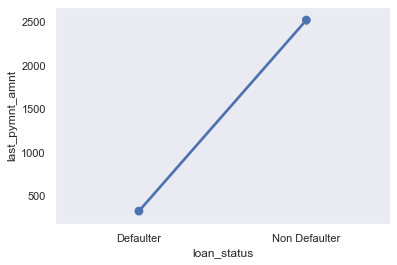

In [47]:
# plotting point plots to understand the association/mean and std deviation of defaulter and non defaulter category with all numeric columns
N=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate',
       'installment','annual_inc','dti',
       'open_acc','revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']
for i in N:
    ax = sns.pointplot(x="loan_status", y=i, data=df)
    plt.show()

In [48]:
# One hot encoding on loan status to find highly correlated numeric values with loan status column
df_corr = pd.get_dummies(df,columns = ['loan_status'],drop_first = True)

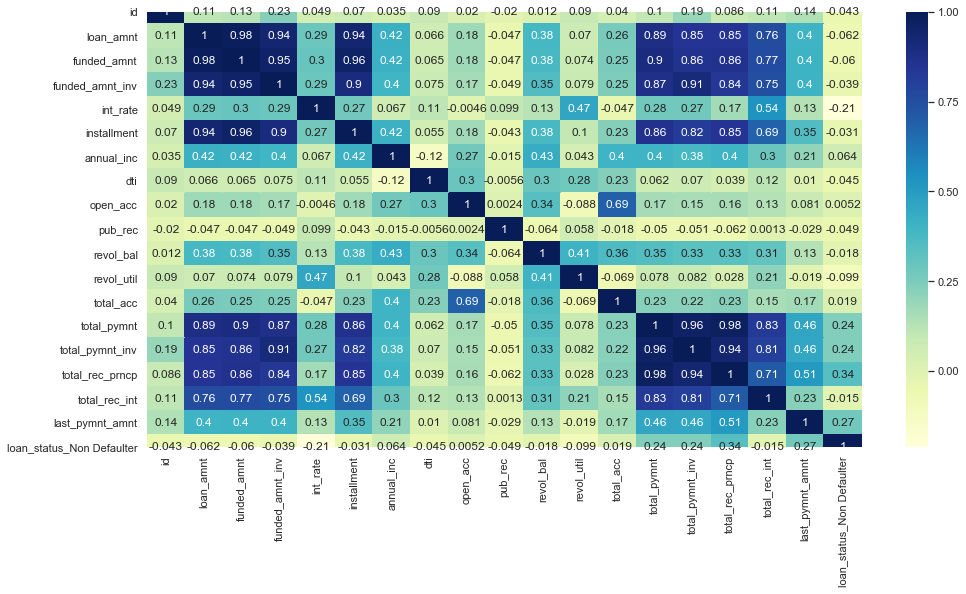

In [49]:
# Heatmap to find highly correlated numeric values to the target variable(loan status)
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True)

In [50]:
#Splitting the data into two dataframes on 'loan status' to perform segmented univariate analysis
df_defaulter=df[df['loan_status']=='Defaulter']
df_non_defaulter=df[df['loan_status']=='Non Defaulter']

In [51]:
# summary statistics of defaulters and non defaulters
df_defaulter.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,5.115000e+03,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000
mean,6.981147e+05,12071.911046,11754.139785,10828.598363,13.319844,336.143760,60371.714909,14.095406,9.228739,0.082307,12423.117693,55.940438,21.522972,6909.858237,6414.918489,4026.240252,2009.350835,325.647717
std,2.175044e+05,7595.594790,7343.967032,7226.801610,3.676622,206.096011,30663.044927,6.541546,4.301103,0.281883,10609.974621,27.706870,11.186373,6473.295622,6319.638444,3984.364711,1848.469286,460.330611
min,6.141900e+04,900.000000,900.000000,0.000000,5.000000,22.790000,4080.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.308660e+05,6000.000000,6000.000000,5000.000000,11.000000,171.635000,38398.500000,9.240000,6.000000,0.000000,4150.500000,35.100000,13.000000,2248.010000,1896.150000,1239.870000,576.615000,115.010000
50%,7.009680e+05,10000.000000,10000.000000,9600.000000,13.000000,299.040000,54000.000000,14.400000,9.000000,0.000000,9481.000000,58.800000,20.000000,4951.380000,4449.920000,2775.960000,1340.720000,242.530000
75%,8.560645e+05,17000.000000,16000.000000,15000.000000,16.000000,461.830000,75000.000000,19.300000,12.000000,0.000000,17731.500000,79.150000,29.000000,9384.300000,8707.565000,5416.840000,2873.815000,411.710000
max,1.077430e+06,29100.000000,29250.000000,28500.000000,24.000000,828.000000,145100.000000,29.850000,21.000000,2.000000,37324.000000,99.900000,52.000000,33143.000000,31965.000000,27492.000000,6149.000000,8180.000000


In [52]:
df_non_defaulter.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,3.096600e+04,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000,30966.000000
mean,6.720510e+05,10825.494898,10595.201996,10076.358091,11.069851,318.360026,66280.027101,13.236912,9.291772,0.049151,11869.996609,47.887752,22.134276,12575.550154,11937.674168,10553.543988,1936.766249,2519.479679
std,2.077065e+05,6878.142402,6682.712013,6612.251948,3.626828,196.150032,32441.755690,6.654275,4.214416,0.226116,10491.340035,28.181850,11.082133,8137.917379,8017.299631,6571.049420,1712.324930,2900.073315
min,5.574200e+04,500.000000,500.000000,0.000000,5.000000,16.080000,4000.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,526.332241,0.000000,500.000000,6.220000,0.000000
25%,5.087822e+05,5500.000000,5375.000000,5000.000000,8.000000,167.080000,42000.000000,8.110000,6.000000,0.000000,3694.250000,24.400000,14.000000,6227.801604,5798.170000,5375.000000,670.985000,260.950000
50%,6.497385e+05,9600.000000,9500.000000,8775.000000,11.000000,278.230000,60000.000000,13.300000,9.000000,0.000000,8826.000000,48.000000,21.000000,10806.086160,10100.610000,9500.000000,1325.315000,893.355000
75%,8.225218e+05,15000.000000,14600.000000,13975.000000,13.000000,421.875000,84000.000000,18.480000,12.000000,0.000000,16938.000000,71.100000,29.000000,17095.138260,16352.960000,14600.000000,2673.905000,4331.982500
max,1.076863e+06,29100.000000,29250.000000,28500.000000,24.000000,828.000000,145100.000000,29.990000,21.000000,4.000000,37324.000000,99.900000,52.000000,33143.000000,31965.000000,27492.000000,6149.000000,8180.000000


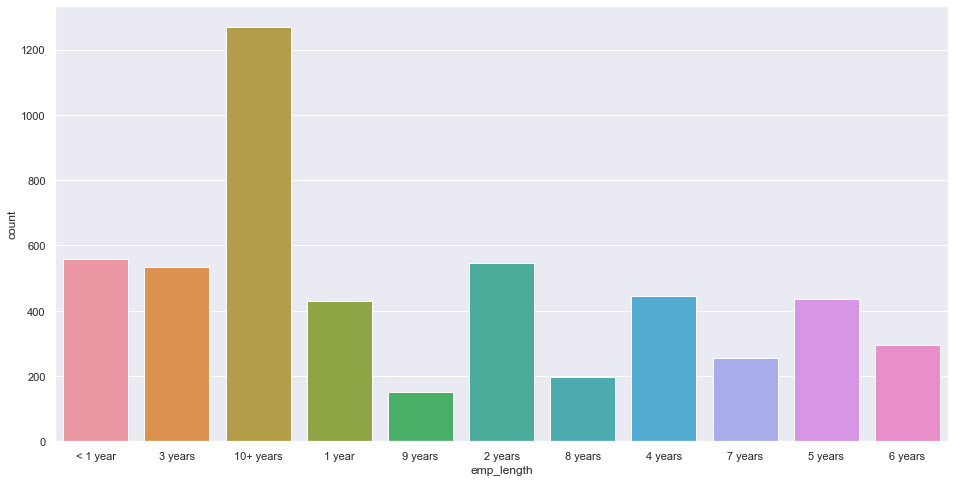

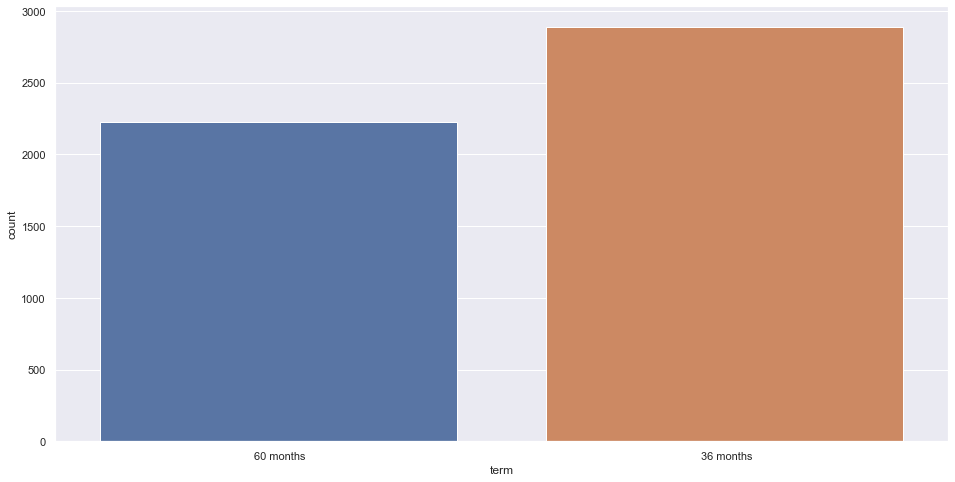

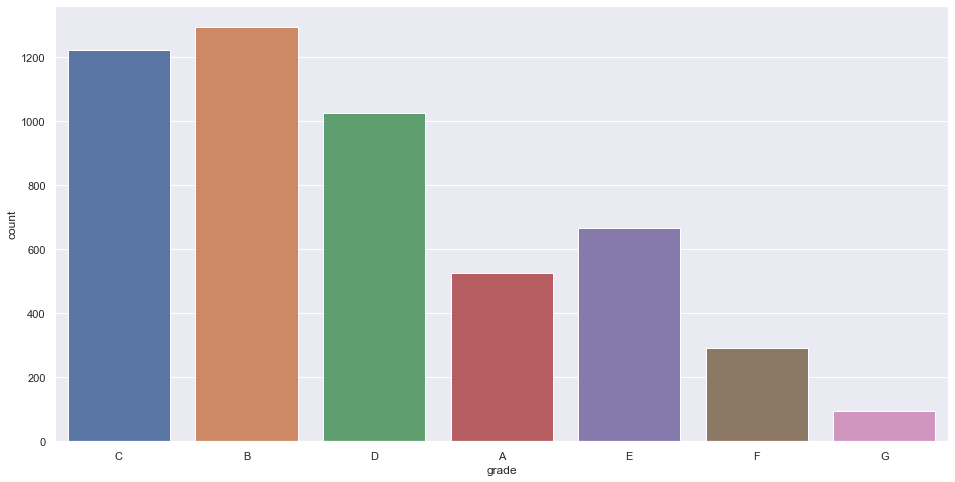

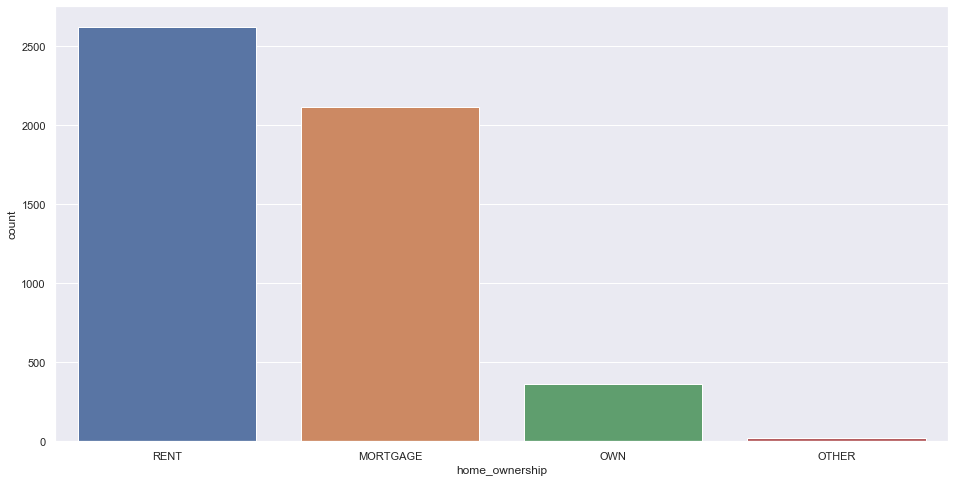

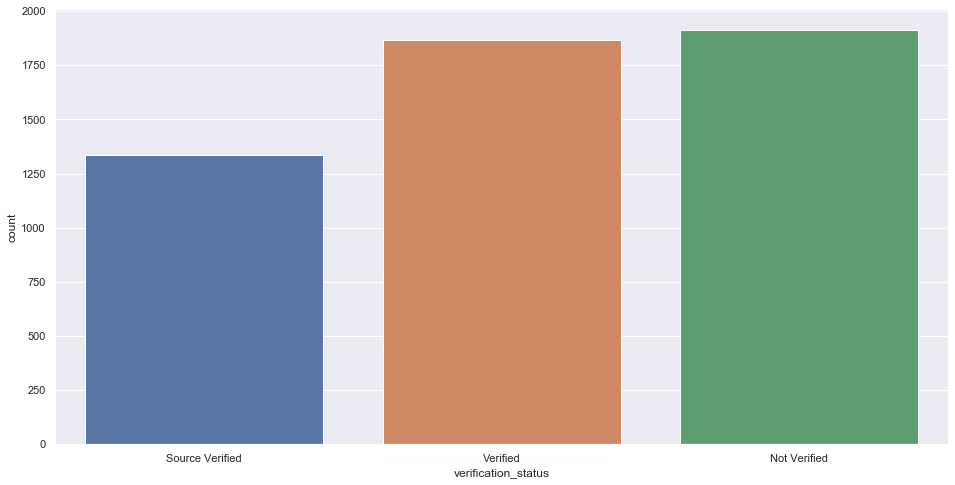

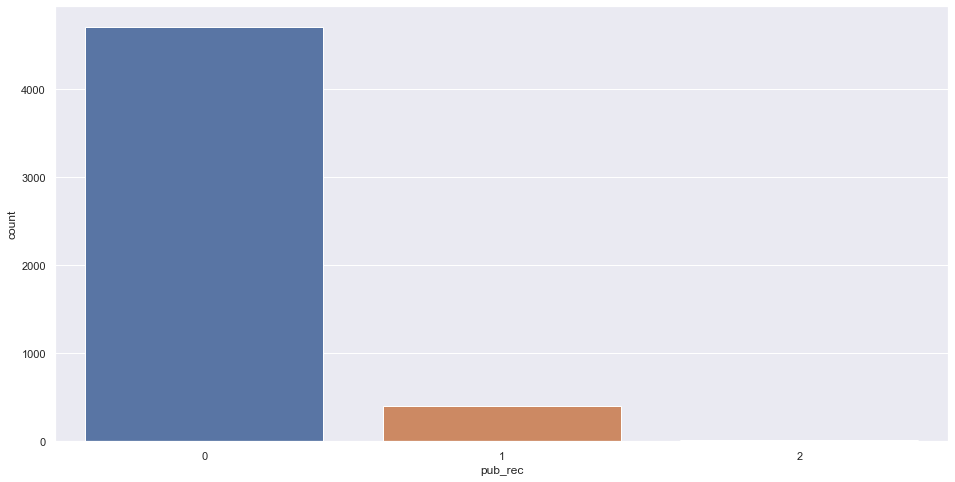

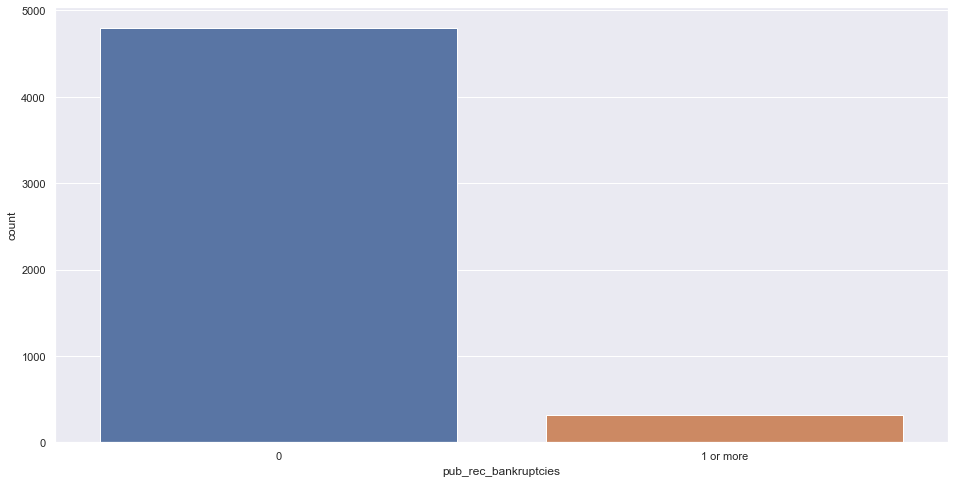

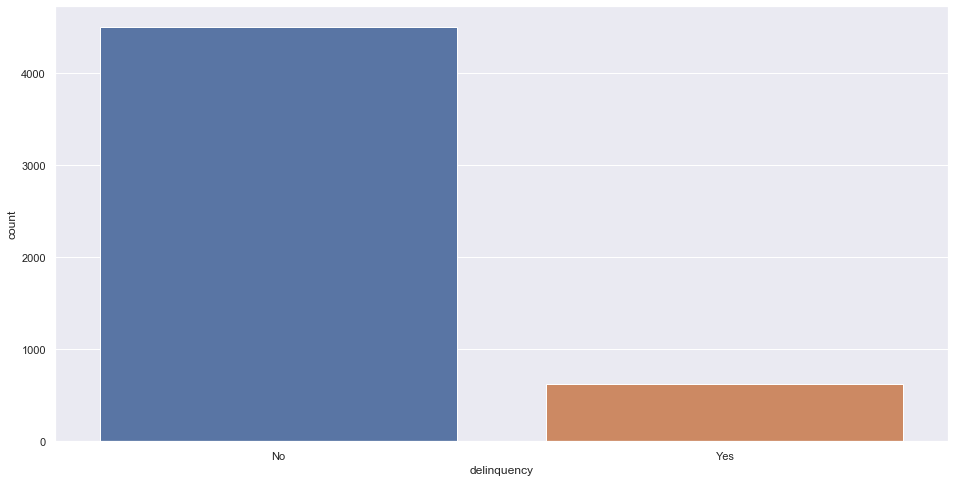

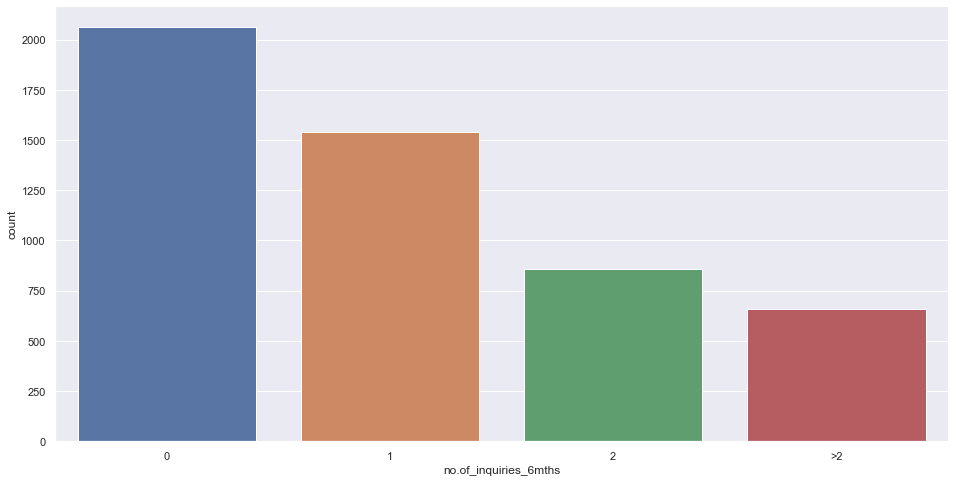

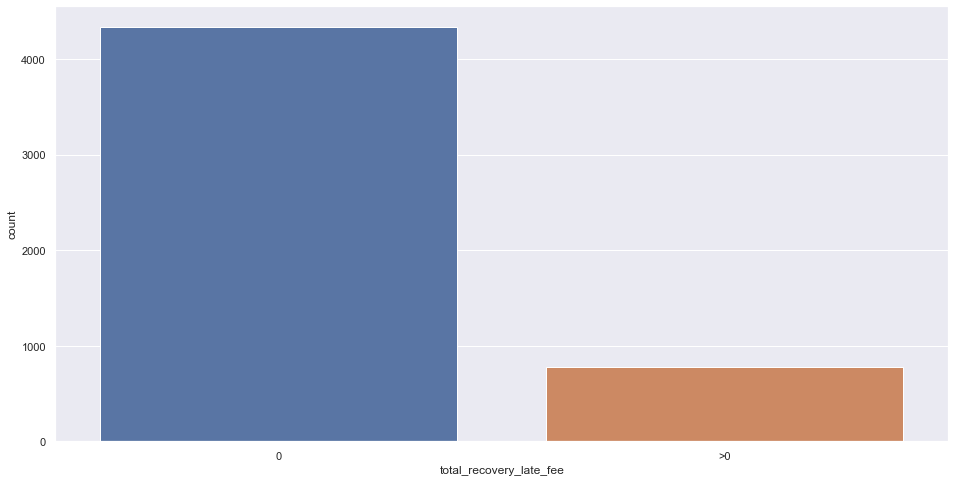

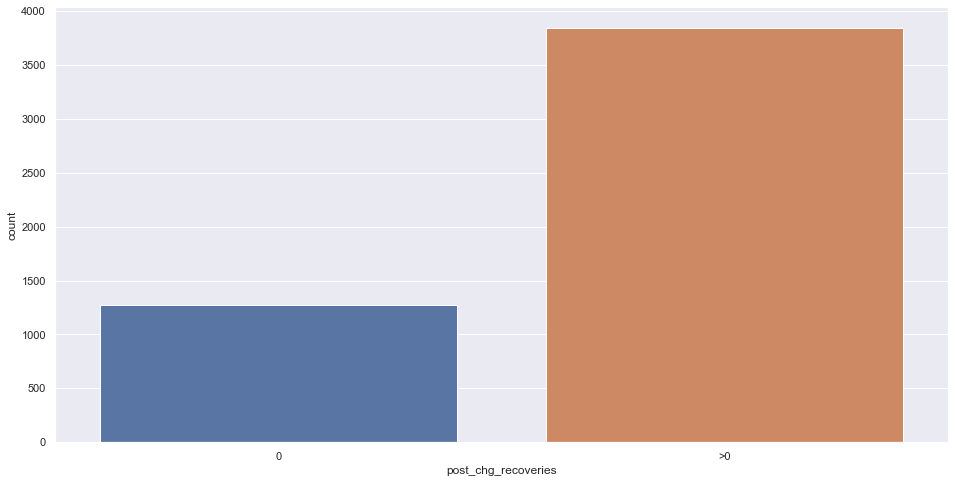

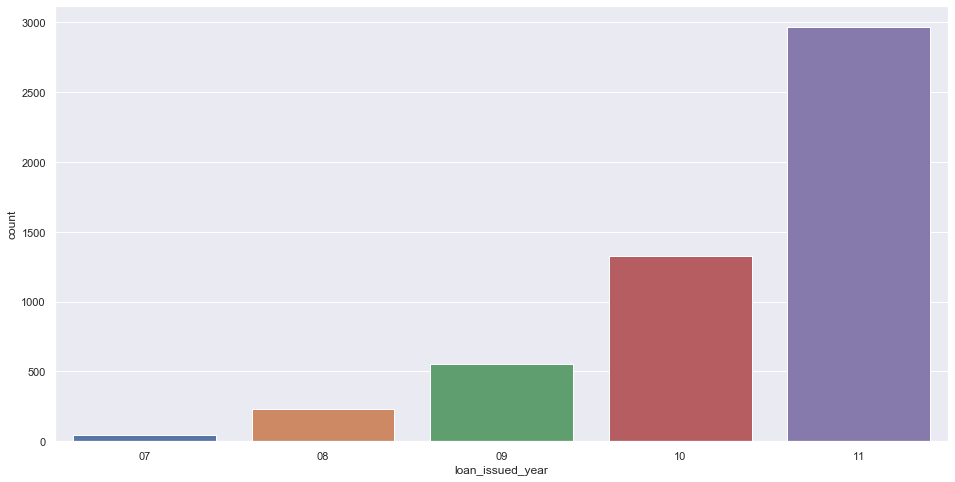

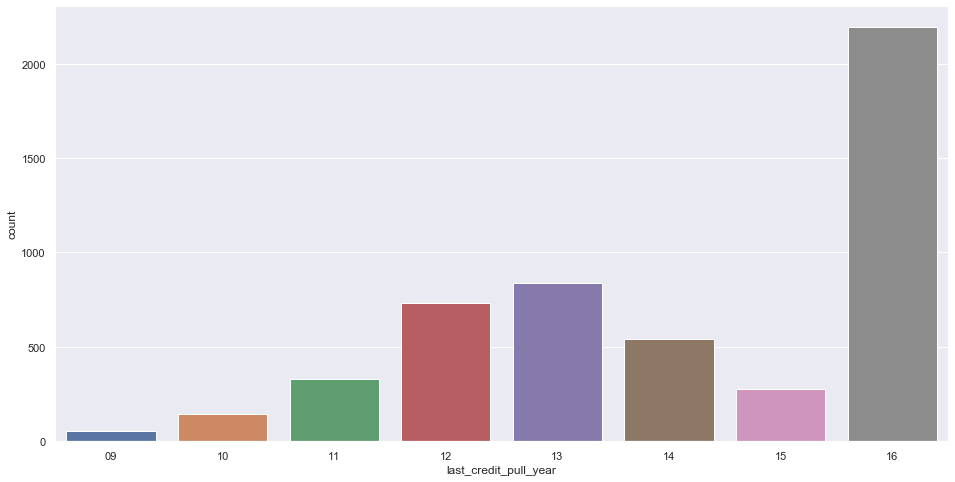

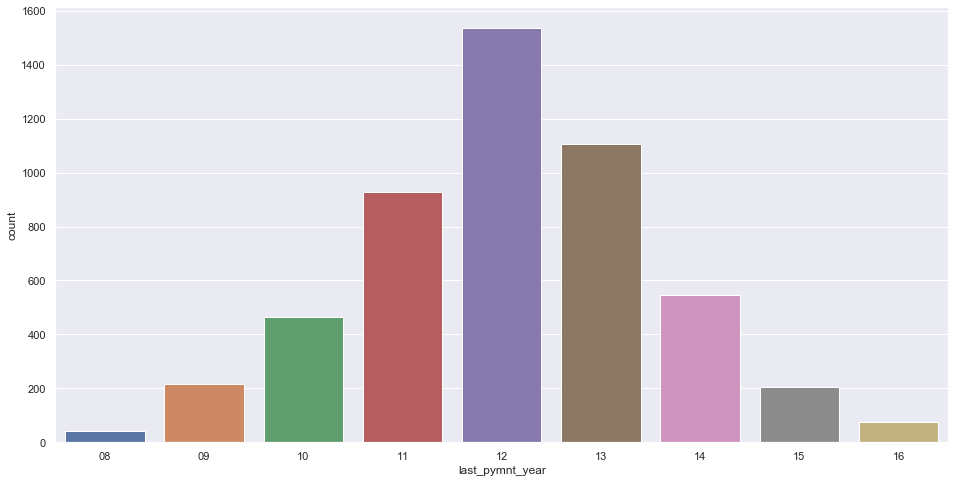

In [53]:
# Countplots of defaulters , to find in which category most of the defaulters lie
k=['emp_length','term','grade','home_ownership','verification_status',
       'pub_rec','pub_rec_bankruptcies',
       'delinquency', 'no.of_inquiries_6mths',
       'total_recovery_late_fee',
       'post_chg_recoveries', 'loan_issued_year', 'last_credit_pull_year',
       'last_pymnt_year']
for i in k:
    ax=sns.countplot(x=i, data=df_defaulter)
    plt.show()

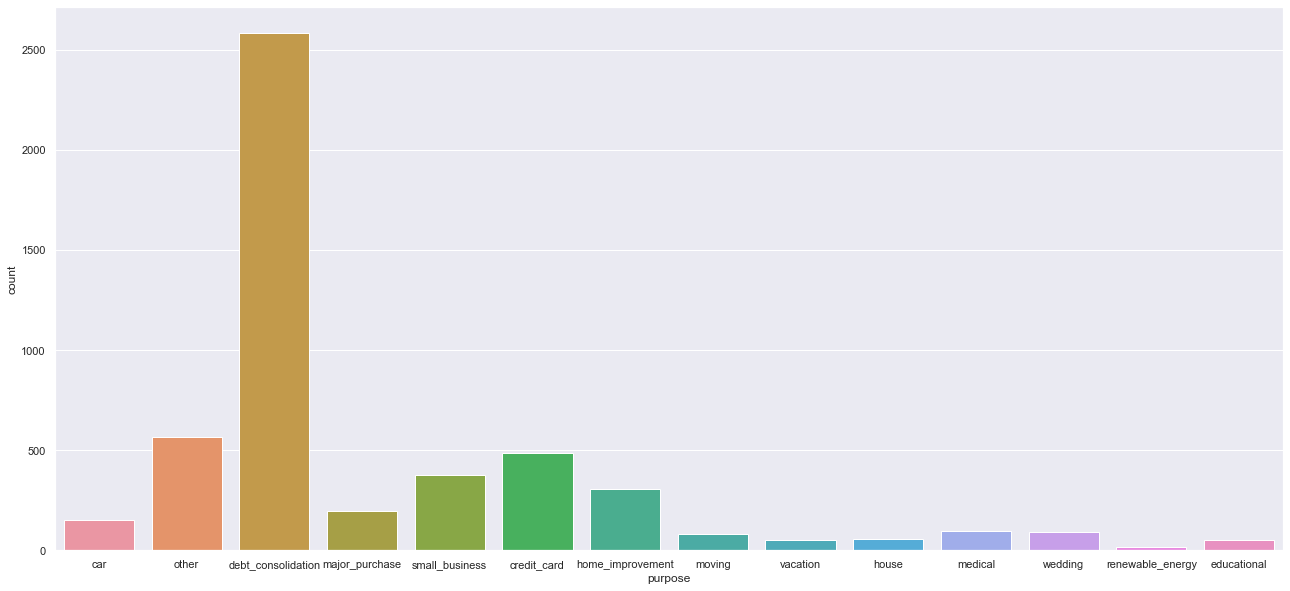

In [54]:
plt.figure(figsize=(22,10))
ax=sns.countplot(x='purpose', data=df_defaulter)
plt.show()

In [55]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df['loan_amnt_catg'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df['annual_inc_catg'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df['int_rate_catg'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df['dti_catg'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [56]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -
inc_range_vs_loan = df.groupby(['annual_inc_catg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Defaulter'] + inc_range_vs_loan['Non Defaulter'] 
inc_range_vs_loan['Defaulter_Proportion'] = inc_range_vs_loan['Defaulter'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Defaulter_Proportion', ascending=False)

loan_status,annual_inc_catg,Defaulter,Non Defaulter,Total,Defaulter_Proportion
0,0-20000,175,745,920,0.190217
1,20000-40000,1349,6453,7802,0.172904
2,40000-60000,1595,9045,10640,0.149906
3,60000-80000,961,6341,7302,0.131608
4,80000 +,1035,8382,9417,0.109908


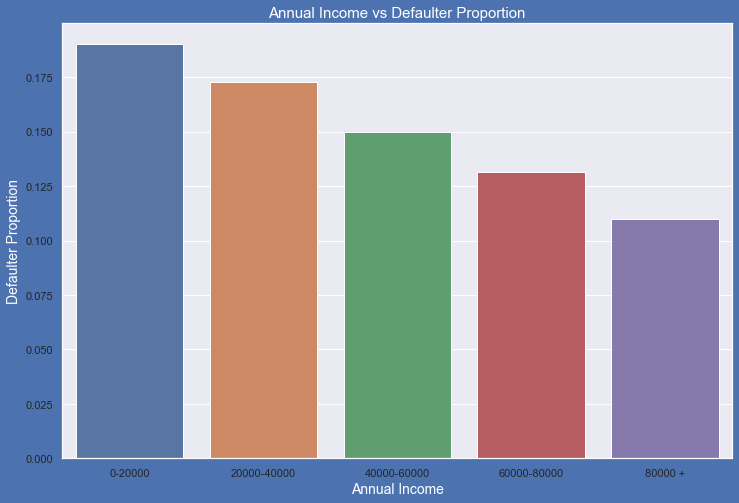

In [57]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Defaulter Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_catg', y='Defaulter_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Defaulter Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()
# Observations:
# Income range 80000+  has less chances of Default.
# Income range 0-20000 has high chances of Default.
# Notice that with increase in annual income Defaulter proportion got decreased.

In [58]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = df.groupby(['int_rate_catg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Defaulter'] + interest_vs_loan['Non Defaulter'] 
interest_vs_loan['Defaulter_Proportion'] = interest_vs_loan['Defaulter'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Defaulter_Proportion', ascending=False)

loan_status,int_rate_catg,Defaulter,Non Defaulter,Total,Defaulter_Proportion
3,16 +,874,2151,3025,0.288926
2,12.5-16,1931,8473,10404,0.185602
1,10-13,1044,6156,7200,0.145000
0,0-10,1130,14002,15132,0.074676


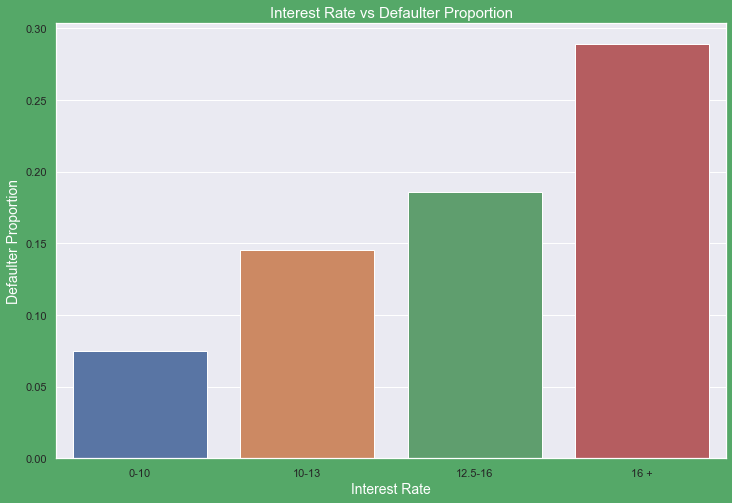

In [59]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Interest Rate vs Defaulter Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_catg', y='Defaulter_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Defaulter Proportion',fontsize=14,color = 'w')
plt.show()
# Observations:
# interest rate less than 10% has very less chances of Default. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of Default as compared to other category intrest rates.
# Defaulter proportion is increasing with higher intrest rates.

In [60]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Defaulter'] + state_vs_loan['Non Defaulter'] 
state_vs_loan['Defaulter_Proportion'] = state_vs_loan['Defaulter'] / state_vs_loan['Total']
state_vs_loan.sort_values('Defaulter_Proportion', ascending=False)

loan_status,addr_state,Defaulter,Non Defaulter,Total,Defaulter_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,97.0,348.0,445.0,0.217978
0,AK,15.0,59.0,74.0,0.202703
13,ID,1.0,4.0,5.0,0.200000
40,SD,10.0,46.0,56.0,0.178571
9,FL,457.0,2130.0,2587.0,0.176652
11,HI,26.0,128.0,154.0,0.168831
31,NM,28.0,140.0,168.0,0.166667
10,GA,203.0,1076.0,1279.0,0.158718
24,MO,98.0,521.0,619.0,0.158320


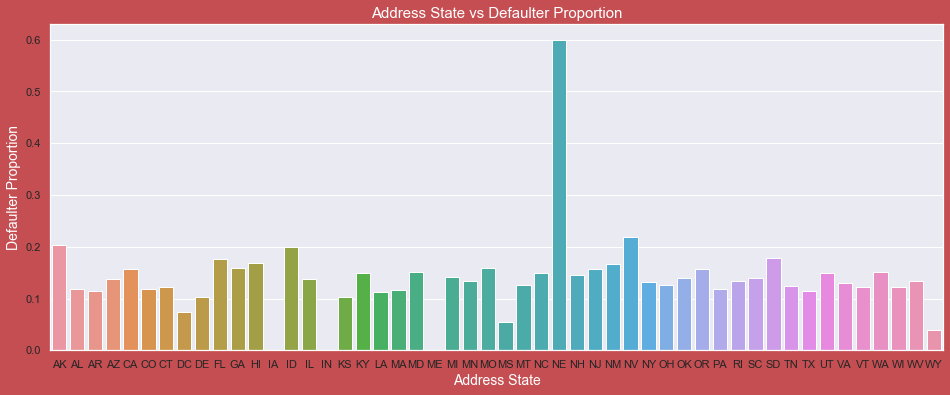

In [61]:
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='r')
ax1.set_title('Address State vs Defaulter Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Defaulter_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Defaulter Proportion',fontsize=14,color = 'w')
plt.show()
# Observations:
# states NE has very high chances of Defaulting but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of Defaulters in good number of applications.

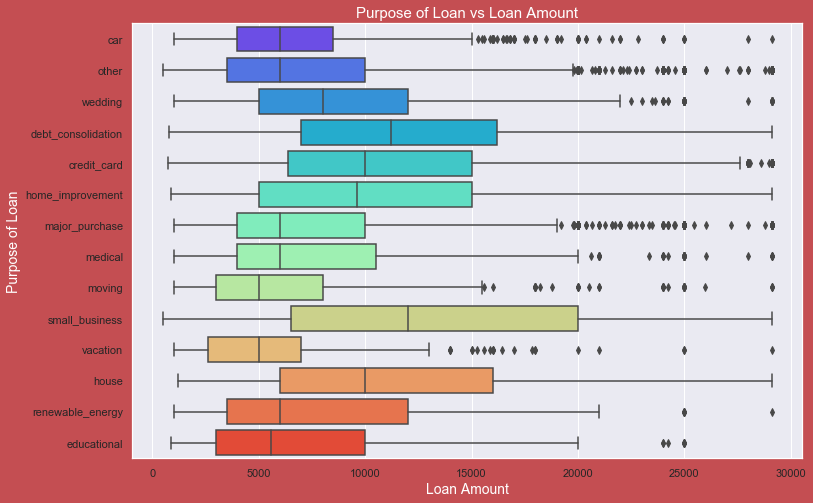

In [62]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='r')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

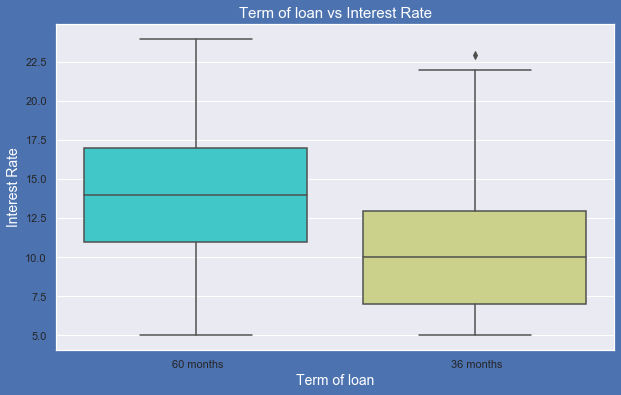

In [63]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge interest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

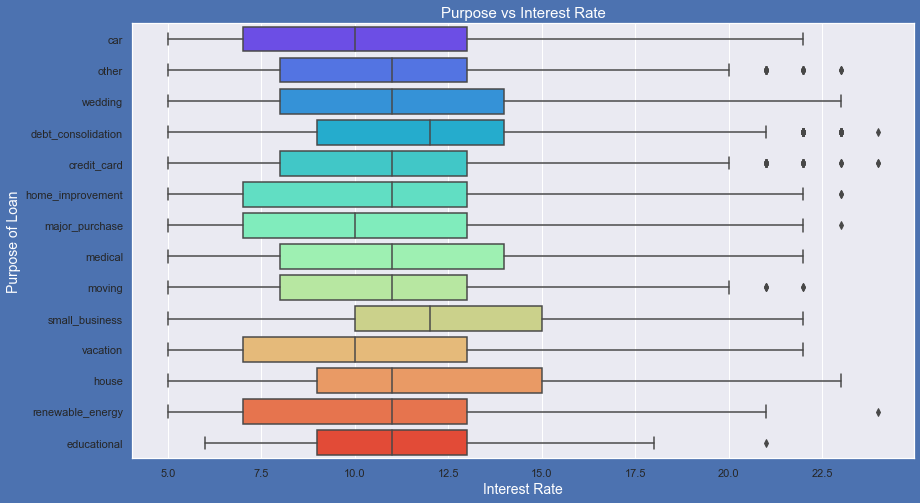

In [64]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =df,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge interest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more interest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


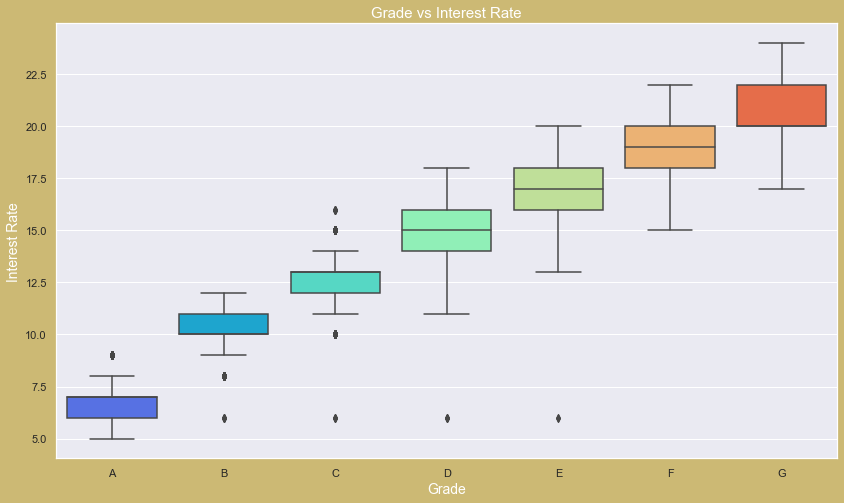

In [65]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='y')
ax = sns.boxplot(y='int_rate', x='grade', data =df,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='W')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that interest rate is increasing with grades moving from A to F.

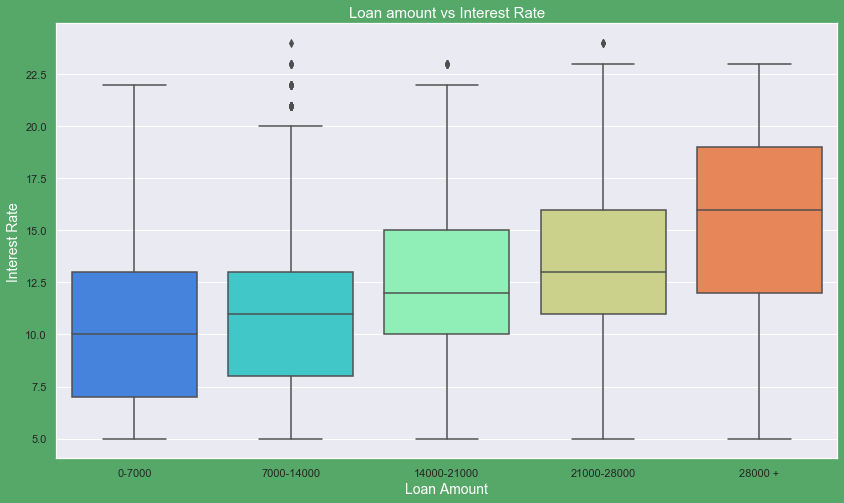

In [66]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='loan_amnt_catg', data =df ,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate

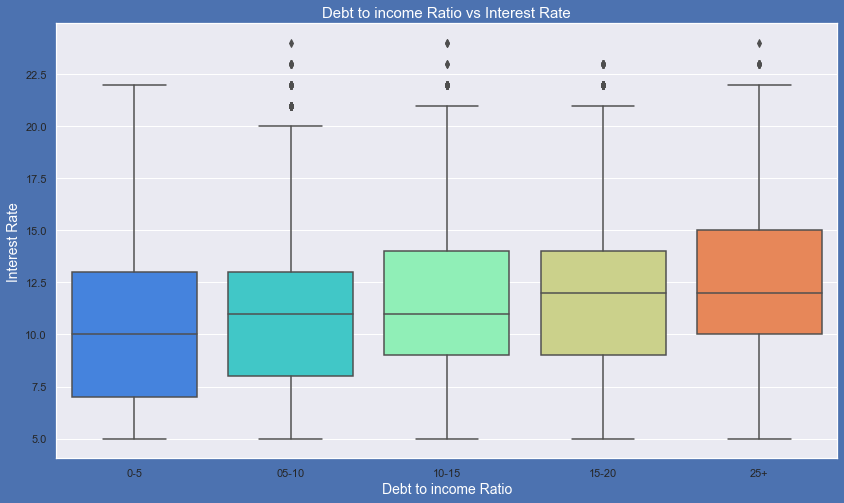

In [67]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_catg', data =df,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

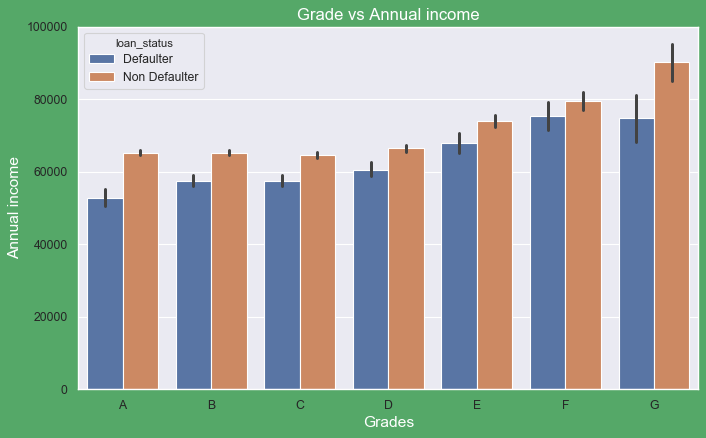

In [68]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='g', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()
# Observations:
# From this we can conclude that the ones getting 'Defaulter' have lower annual incomes than the ones 
# who'Non Defaulted' for each and every grade (i.e. at same interest range)